# Overview

I'll be graphing simple visualizations in order to better understand retail purchases by segmenting them into 3 broad categories. <br>
1) Product <br>
2) Customer <br>
3) Location <br>

# Context

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products.

# Reading and Describing the Data 

In [168]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [169]:
data = pd.read_csv('BlackFriday.csv')

In [170]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Describing the Data

In [171]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [172]:
total_null = data.isnull().sum()
total_null

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

The data has null values or empty values for Product_Category_2 and Product_Category_3. This suggests customers may not have bought in all product categories, but have purchased in at least one

In [173]:
print('Unique Values for Each Features')

for i in data.columns:
    print(i,':',data[i].nunique())

Unique Values for Each Features
User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


#### Data Notes
There is a total of 3623 different products that are placed across 50 different product categories. <br>
Purchase refers to the dollar amount of the purchased product<br>
*For the purposes of this analysis I will be extracting data only in Product_Category_1* <br>
*Note it is typical for cpg companies to only manage one product category or only one brand name product at a time*

In [174]:
category1 = data[data['Product_Category_1'].notnull()]
category1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Product

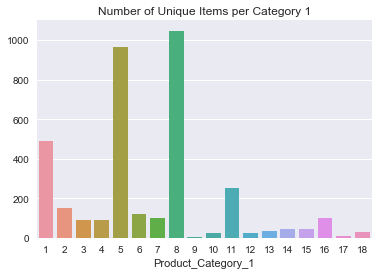

In [175]:
#Unique products
products_by_category1 = data.groupby('Product_Category_1')['Product_ID'].nunique()
#products_by_category1

sns.barplot(x = products_by_category1.index, y = products_by_category1.values)
plt.title('Number of Unique Items per Category 1')
plt.show()

In [176]:
#Calculates the total purchases in for each Product Category 1
sum_product_table = pd.pivot_table(data,values = 'Purchase', 
                               index = ['Product_Category_1'],
                               aggfunc = np.sum)

#Calculates the average purchases in for each Product Category 1
avg_product_table = pd.pivot_table(data,values = 'Purchase', 
                               index = ['Product_Category_1'],
                               aggfunc = np.mean)


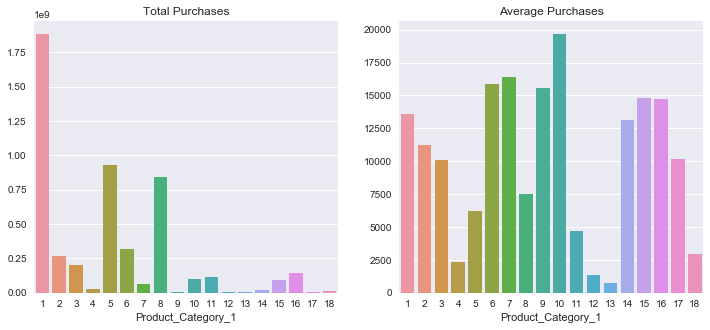

In [177]:
#Bar Graphs
fig,axes = plt.subplots(1,2,figsize = (12,5))

sns.barplot(x = sum_product_table.index, y = sum_product_table.values,ax = axes[0])
axes[0].set_title('Total Purchases')

sns.barplot(x = avg_product_table.index, y = avg_product_table.values, ax = axes[1])
axes[1].set_title('Average Purchases')

Majority of purchases (dollar value) are coming from Product 1, followed by Product Category 5 and Product Category 8. When comparing the total to the average value of the product categories, the graphs suggest that the average value or average price of the product category does not strongly determine the demand or quantity. To confirm that hypothesis we can then calculate the average quantity by product category.

### Calculating Avg Quantity by Product Category
Avg Quantity will be defined by the following equation: <br>
Avg Quantity = Total Purchase Value / Avg Purchase Value 

In [178]:
#Calculates the total purchases in for each Product Category 1
sum_product_table = pd.pivot_table(data,values = 'Purchase', 
                               index = ['Product_Category_1'],
                               aggfunc = np.sum)


#Calculates the average purchases in for each Product Category 1
avg_product_table = pd.pivot_table(data,values = 'Purchase', 
                               index = ['Product_Category_1'],
                               aggfunc = np.mean)

#resets index so headers are on the same row
total = pd.DataFrame(sum_product_table).reset_index()
avg = pd.DataFrame(avg_product_table).reset_index()


#create dataframe that aggregates total value and avg value in order to calculate avg quantity
product_df = pd.DataFrame()
product_df['Category'] = total['Product_Category_1']
product_df['Total Value'] = total['Purchase']
product_df['Avg Value'] = avg['Purchase']
product_df['Avg Quantity'] = total['Purchase']/avg['Purchase']
product_df.head()

,Category,Total Value,Avg Value,Avg Quantity
0,1,1882666325,13607.701495,138353.0
1,2,264497242,11255.680752,23499.0
2,3,200412211,10096.841705,19849.0
3,4,26937957,2328.862886,11567.0
4,5,926917497,6238.004045,148592.0


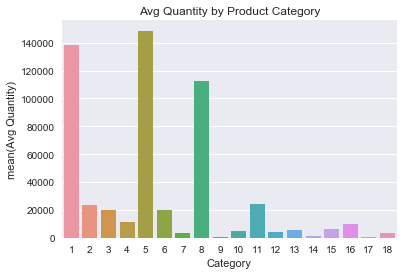

In [179]:
sns.barplot(data = product_df,x = product_df['Category'], y = product_df['Avg Quantity'])
plt.title('Avg Quantity by Product Category')
plt.show()

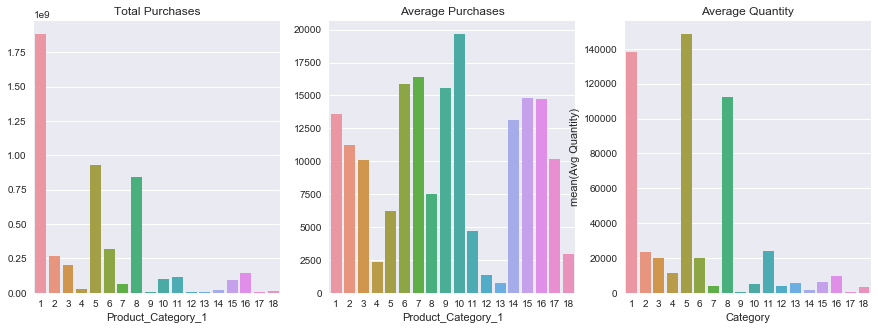

In [180]:
#Graphing everything side by side

#Bar Graphs
fig,axes = plt.subplots(1,3,figsize = (15,5))

sns.barplot(x = sum_product_table.index, y = sum_product_table.values,ax = axes[0])
axes[0].set_title('Total Purchases')

sns.barplot(x = avg_product_table.index, y = avg_product_table.values, ax = axes[1])
axes[1].set_title('Average Purchases')

sns.barplot(data = product_df,x = product_df['Category'], y = product_df['Avg Quantity'], ax = axes[2])
axes[2].set_title('Average Quantity')

Comparing the the Product Categories by Avg Quantity, Avg Purchases, and Total Purchases, we observe that Product Category 1 has the highest total value due to both its demand (quantity) and its higher relative price (avg purchases). Even though Product Category 5 and 8 also have relatively high total values and high quantities, their prices are on the lower end compared to other product categories.

# Customer

### Gender Breakout

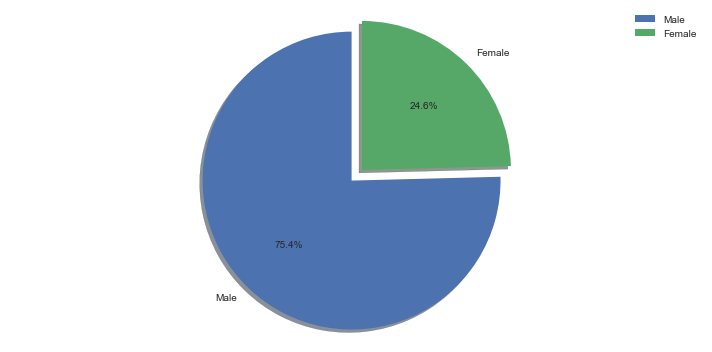

In [181]:
#Pie Graph that displays overall percetange breakout

explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(category1['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Approximately 75% of all customers are male, while only 25% of customers are female

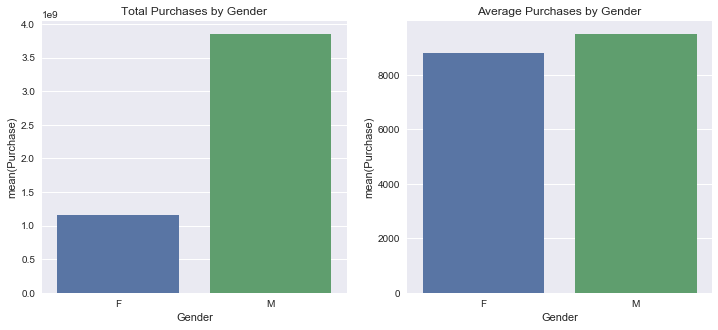

In [182]:
fig, axes = plt.subplots(1,2,figsize = (12,5))

sum_gender = category1.groupby('Gender')['Purchase'].sum().reset_index()
avg_gender = category1.groupby('Gender')['Purchase'].mean().reset_index()


sns.barplot(data = sum_gender, x = sum_gender['Gender'], y = sum_gender['Purchase'], ax = axes[0])
axes[0].set_title('Total Purchases by Gender')

sns.barplot(data = avg_gender, x = avg_gender['Gender'], y = avg_gender['Purchase'], ax = axes[1])
axes[1].set_title('Average Purchases by Gender')


Males spent over 3x in terms of total purchase value. Their average purchase value was also higher. This suggests that Males are purchasing more in quantity and more expensive items in aggregate.

### Age Breakout

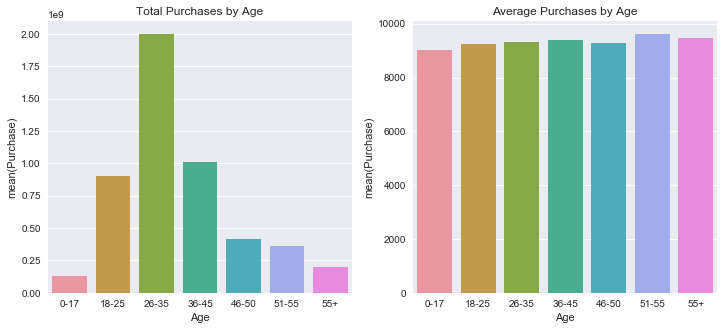

In [183]:
#Total Purchases compared to Average Purchases

fig, axes = plt.subplots(1,2,figsize = (12,5))

sum_gender = category1.groupby('Age')['Purchase'].sum().reset_index()
avg_gender = category1.groupby('Age')['Purchase'].mean().reset_index()


sns.barplot(data = sum_gender, x = sum_gender['Age'], y = sum_gender['Purchase'], ax = axes[0])
axes[0].set_title('Total Purchases by Age')

sns.barplot(data = avg_gender, x = avg_gender['Age'], y = avg_gender['Purchase'], ax = axes[1])
axes[1].set_title('Average Purchases by Age')

Customers ages 26-35 are the bulk of the customers, however the average value of their purchases are similar to any other age group. This may suggest that there are more customers from 26-35 than any other age group and/or they bought higher quantity of items.

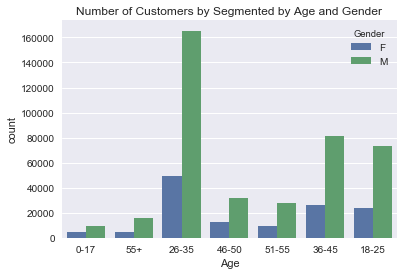

In [184]:
sns.countplot(category1['Age'],hue=category1['Gender'])
plt.title('Number of Customers by Segmented by Age and Gender')

Customers from the ages 26 - 35 make up a large portion of the total number of customers

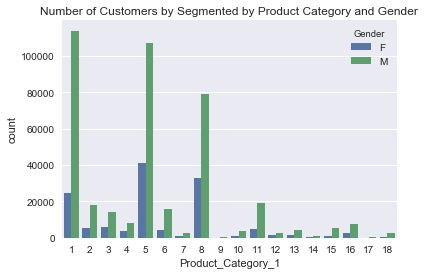

In [185]:
sns.countplot(category1['Product_Category_1'],hue=category1['Gender'])
plt.title('Number of Customers by Segmented by Product Category and Gender')

The top 3 Product Categories are high regardless of Gender, which are Product Categories 1,5, and 8. The discrepancy may be due to the proportion of customers that are male versus female.

# Location

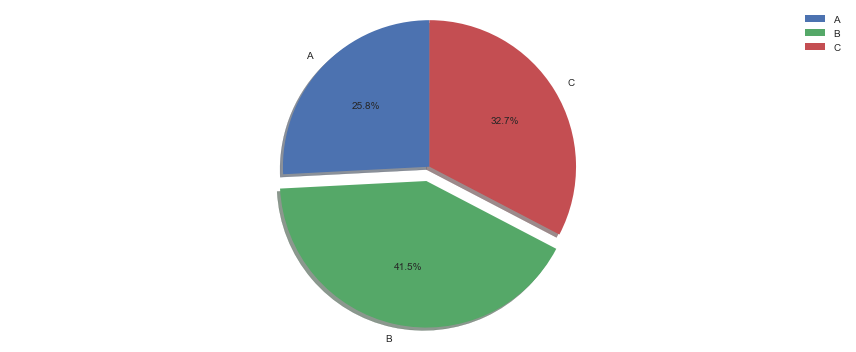

In [186]:
#Pie Graph that displays overall percetange breakout

explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.pie(category1.groupby('City_Category')['Purchase'].sum(),explode=explode, labels=['A','B','C'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

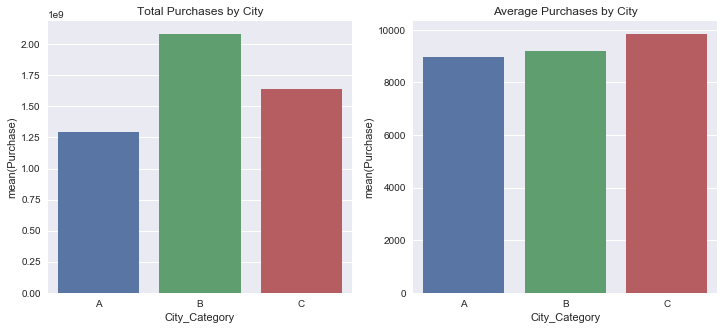

In [187]:
#Total Purchases compared to Average Purchases

fig, axes = plt.subplots(1,2,figsize = (12,5))

sum_gender = category1.groupby('City_Category')['Purchase'].sum().reset_index()
avg_gender = category1.groupby('City_Category')['Purchase'].mean().reset_index()


sns.barplot(data = sum_gender, x = sum_gender['City_Category'], y = sum_gender['Purchase'], ax = axes[0])
axes[0].set_title('Total Purchases by City')

sns.barplot(data = avg_gender, x = avg_gender['City_Category'], y = avg_gender['Purchase'], ax = axes[1])
axes[1].set_title('Average Purchases by City')

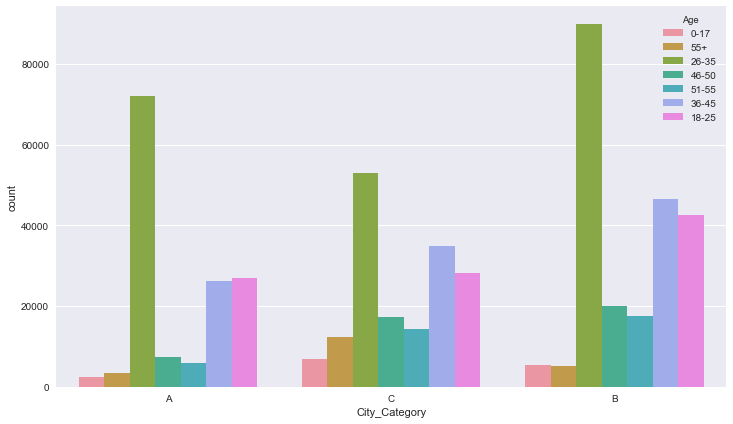

In [188]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(category1['City_Category'],hue=category1['Age'])

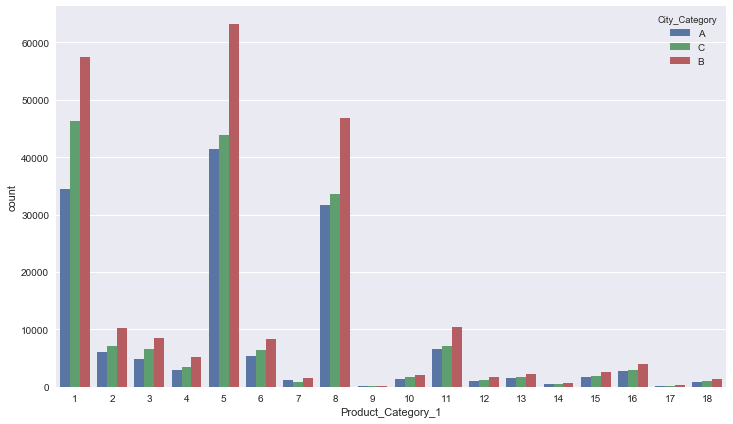

In [189]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(category1['Product_Category_1'],hue=category1['City_Category'])

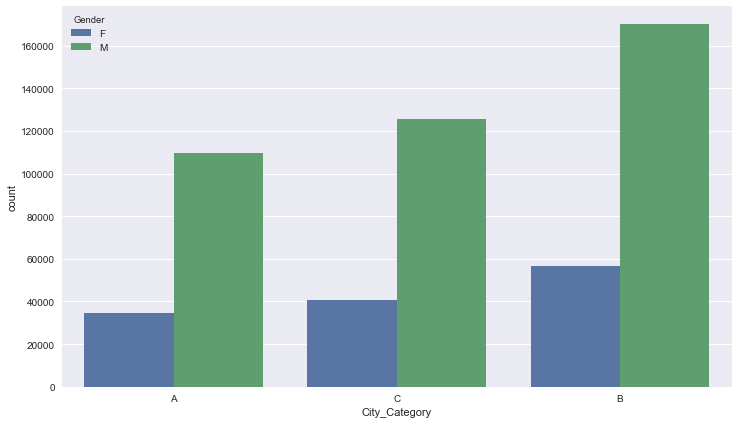

In [190]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(category1['City_Category'],hue=category1['Gender'])

# Summary

* Product Category 1 had the highest purchase amount due to the quantity sold and its relatively higher price. <br>
* 75% of customers were male, while 25% of customers were female <br>
* The most popular product categories tended to have high volume of sales regardless of gender <br>
* Customers from the ages 26 - 35 were the most valuable customers in total due to the size of the age group <br>
* City B had the most customers, which lead to more total sales compared to the other cities <br>

### Possible Further Analysis
Clustering analysis such as k-means or hierarchical clustering can be conducted to group customers more quantitativly than categories such as age and location. Individual product performance can also be evaluated, for example within Product Category 1 there are various Product IDs which may give more insight as to why Product Category 1 performed well.  